In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\hi\Desktop\Data Analytics\Data Sets\new\credit_card_fraud_10k.csv")

In [4]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [5]:
#feature report
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [7]:
#duplicates chech
df.duplicated().sum()

np.int64(0)

In [18]:
#statistical summary of numerical features
df = df.drop(columns=['transaction_id'])
num_col = df.select_dtypes('int64','float64').columns
df.describe()[num_col].T

,count,mean,std,min,25%,50%,75%,max
transaction_hour,10000.0,11.5933,6.922708,0.0,6.0,12.0,18.0,23.0
foreign_transaction,10000.0,0.0978,0.297059,0.0,0.0,0.0,0.0,1.0
location_mismatch,10000.0,0.0857,0.279935,0.0,0.0,0.0,0.0,1.0
device_trust_score,10000.0,61.7989,21.487053,25.0,43.0,62.0,80.0,99.0
velocity_last_24h,10000.0,2.0089,1.432559,0.0,1.0,2.0,3.0,9.0
cardholder_age,10000.0,43.4687,14.979147,18.0,30.0,44.0,56.0,69.0
is_fraud,10000.0,0.0151,0.121957,0.0,0.0,0.0,0.0,1.0


In [16]:
#features consistency check categoric columns
cat_col= ['merchant_category','foreign_transaction','location_mismatch','is_fraud']

for col in cat_col:
    print(f"{col} Unique values are {df[col].unique()}")

merchant_category Unique values are ['Electronics' 'Travel' 'Grocery' 'Food' 'Clothing']
foreign_transaction Unique values are [0 1]
location_mismatch Unique values are [0 1]
is_fraud Unique values are [0 1]


# Exploratory Data Analusis

### Univariate analysis

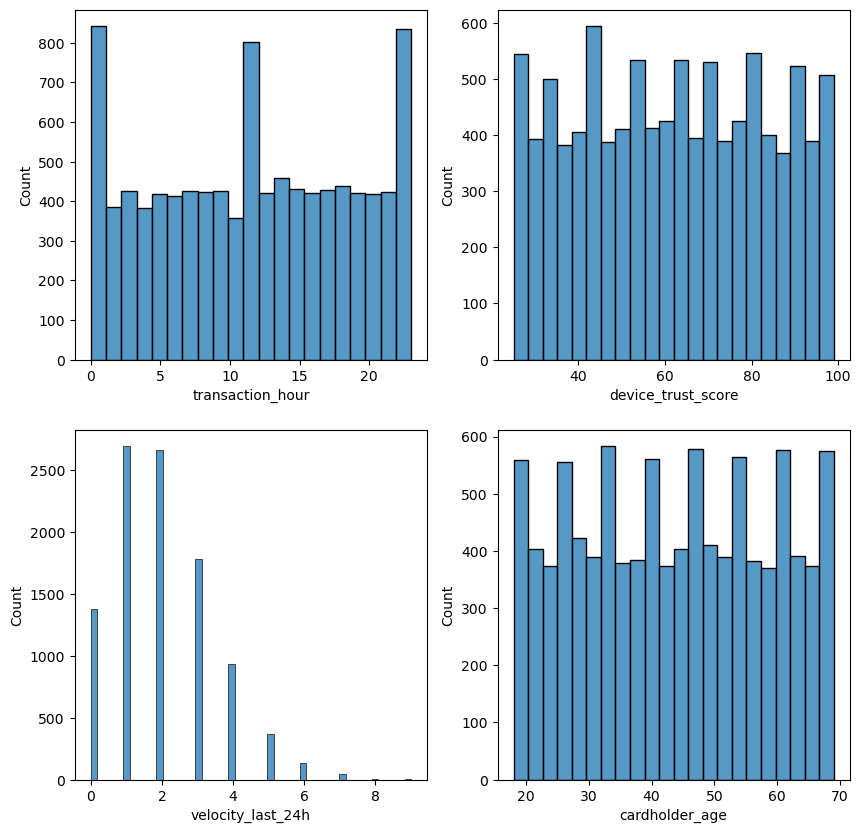

In [23]:
#distribution of numeric values 
#['transaction_hour', 'foreign_transaction','location_mismatch', 'device_trust_score', 'velocity_last_24h',
#       'cardholder_age', 'is_fraud']
num_col = ['transaction_hour', 'device_trust_score', 'velocity_last_24h','cardholder_age']

fig, ax=plt.subplots(2,2 , figsize=(10,10))
ax=ax.flatten()

for i, col in enumerate(num_col):
    sns.histplot(x=df[col], ax=ax[i])

plt.show()    

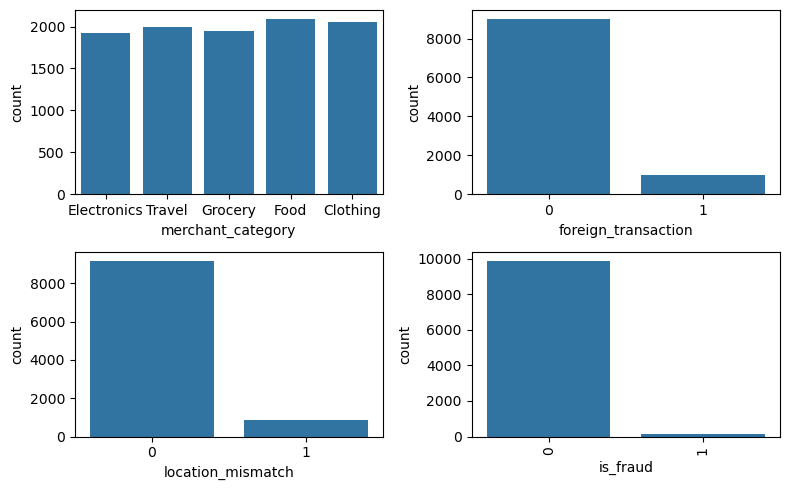

In [34]:
#distribution of categoric values
cat_col
fig, ax=plt.subplots(2,2, figsize=(8,5))
ax = ax.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(x=df[col], ax=ax[i] )

plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

